### Importar CSV de treino

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier

df = pd.read_csv("../../../Files/df_to_train.csv")
df['Total_Review'] = df['Total_Review'].fillna('')
df.head(5)

,Total_Review,review_type
0,Location excellent rooms extremely comfortable...,positive
1,comfortable bed excellent air con great locati...,positive
2,views,positive
3,Clean comfortable room Kettle selection tea ba...,positive
4,Beds comfy staff lovely food amazing room spac...,positive


### Criar objeto CountVectorizer

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle

# o parâmetro ngram_range=(1, 1) significa que o vetorizador 
# irá considerar apenas unigramas, cada token individual será considerado como uma unidade
vect = CountVectorizer(ngram_range=(1, 1))

# ajusta o vetorizador aos dados de texto fornecido
vect.fit(df.Total_Review)

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)

# transforma os textos em uma representação de matriz de contagem de tokens.
text_vect = vect.transform(df.Total_Review)

Mapear os valores para numéricos e dividir os dados em conjunto de treinamento e teste

In [3]:
X = df['Total_Review']
y = df['review_type']
y = y.map({'positive':2, 'neutral':1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(text_vect, y, test_size=0.2, random_state=1)

### Instanciar Modelo XG Booster

In [4]:
xgb = XGBClassifier(n_estimators=600, objective= 'multi:softprob',learning_rate=0.05, max_depth=5, min_child_weight=3, num_class=2)


Treino

In [5]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

Teste

In [6]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7515923566878981

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.75      2076
           1       0.79      0.59      0.68      2228
           2       0.83      0.82      0.83      2133

    accuracy                           0.75      6437
   macro avg       0.76      0.75      0.75      6437
weighted avg       0.76      0.75      0.75      6437



Matriz de confusão

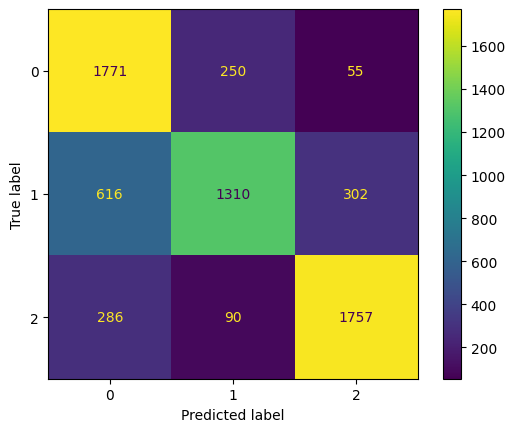

In [8]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()

Salvar modelo

In [9]:
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)
